<a href="https://colab.research.google.com/github/afifrahmann/Unsupervised-Learning-Practice/blob/master/Unsupervised_Learning_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning - Machine Learning

In [ ]:
import pandas as pd
import numpy as np
from numpy import percentile
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.23.5
pandas version :  1.5.3
seaborn version :  0.12.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
path = "/content/drive/MyDrive/CV/Portofolio Afif Rahman/Unsupervised Learning - Machine Learning/flight.csv"
df = pd.read_csv(path)
df.sample(5)

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER  WORK_CITY  \
34528      15811   7/3/2012          7/3/2012    Male         4    beijing   
54049      27735   3/8/2006          3/8/2006  Female         4  guangzhou   
44107      37077   3/7/2007         4/24/2010    Male         4   tangshan   
27015      11596  6/27/2007         6/27/2007    Male         5    beijing   
44042      20033  1/23/2013         3/20/2013  Female         4  guangzhou   

      WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  FLIGHT_COUNT  BP_SUM  \
34528       beijing           CN  30.0  3/31/2014             5    4333   
54049     guangdong           CN  51.0  3/31/2014             3    1463   
44107         hebei           CN  41.0  3/31/2014             3    2117   
27015       beijing           CN  36.0  3/31/2014             5    9047   
44042     guangdong           CN  39.0  3/31/2014             4    3250   

       SUM_YR_1  SUM_YR_2  SEG_KM_SUM LAST_FLIGHT_DATE  LAST_TO_END  \
34528    4208.0     675.0       12602         1/5/2014           87   
54049       0.0    2215.0        3022        2/16/2014           45   
44107    3183.0       0.0        5600       11/15/2012          503   
27015    4009.0    3302.0       10980        1/21/2014           71   
44042    2295.0    1152.0        5621        10/5/2013          179   

       AVG_INTERVAL  MAX_INTERVAL  EXCHANGE_COUNT  avg_discount  Points_Sum  \
34528    137.750000           284               0      0.480238        4333   
54049     55.000000            62               0      0.712535        1463   
44107     99.000000           174               0      0.675821        2117   
27015    138.250000           347               0      0.786921        9047   
44042     66.333333           191               0      0.675730        3250   

       Point_NotFlight  
34528                0  
54049                0  
44107                0  
27015                0  
44042                0

## **EDA**
Descriptive Statistics
Univariate Analysis
Multivariate Analysis
Check Outliers

#### Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [ ]:
# Check missing value
df.isnull().any()

MEMBER_NO            False
FFP_DATE             False
FIRST_FLIGHT_DATE    False
GENDER                True
FFP_TIER             False
WORK_CITY             True
WORK_PROVINCE         True
WORK_COUNTRY          True
AGE                   True
LOAD_TIME            False
FLIGHT_COUNT         False
BP_SUM               False
SUM_YR_1              True
SUM_YR_2              True
SEG_KM_SUM           False
LAST_FLIGHT_DATE     False
LAST_TO_END          False
AVG_INTERVAL         False
MAX_INTERVAL         False
EXCHANGE_COUNT       False
avg_discount         False
Points_Sum           False
Point_NotFlight      False
dtype: bool

Dari Data Info di atas dapat diketahui bahwa:

1. Tipe data yang tidak sesuai adalah FFP_DATE, FIRST_FLIGHT_DATE, FFP_TIER, LOAD_TIME.
2. Terdapat 23 kolom dan 62.988 baris dalam dataset tersebut.
3. Terdapat 7 Kolom yang memiliki missing value, yaitu GENDER, WORK_CITY, WORK_PROVINCE, WORK_COUNTRY, AGE, SUM_YR_1, SUM_YR_2.

In [ ]:
# Mengubah Tipe Data yang Tidak Sesuai
df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'])
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'])
df['FFP_TIER'] = df['FFP_TIER'].astype(object)
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'])

In [ ]:
# karena tanggal 29 Februari tidak dapat diproses, maka akan di handle terlebih dahulu valuenya agar dapat mengubah tipe data kolom LAST_FLIGHT_DATE

df[df.LAST_FLIGHT_DATE.str.contains('2014/2/29')] #mencari nilai '2014/2/29'

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER FFP_TIER     WORK_CITY  \
248        56497 2007-06-17        2007-06-17  Female        6     guangzhou   
447        17306 2009-08-26        2010-04-29    Male        5       haerbin   
473          915 2006-11-10        2007-01-26    Male        5             .   
832        20336 2005-07-13        2005-08-06    Male        5     guangzhou   
1051       62884 2006-05-24        2007-04-21    Male        5         wuhan   
...          ...        ...               ...     ...      ...           ...   
61539      55995 2013-01-11        2013-07-10    Male        4     dalianshi   
61871      48742 2009-07-26        2009-07-26    Male        4       tianjin   
61909       9190 2011-04-11        2011-04-20    Male        4     guangzhou   
62721      38776 2007-10-31        2008-03-13    Male        4        foshan   
62929      46449 2010-02-07        2010-07-31    Male        4  guangzhoushi   

      WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  FLIGHT_COUNT  BP_SUM  \
248       guangdong           CN  46.0 2014-03-31            53  116307   
447    heilongjiang           CN  70.0 2014-03-31            31   96739   
473         beijing           CN  39.0 2014-03-31            49   84754   
832       guangdong           CN  40.0 2014-03-31            80   61418   
1051          hubei           CN  50.0 2014-03-31            27   65918   
...             ...          ...   ...        ...           ...     ...   
61539      liaoning           CN  23.0 2014-03-31             3       0   
61871       tianjin           CN  37.0 2014-03-31             2     854   
61909     guangdong           CN  34.0 2014-03-31             2     838   
62721     guangdong           CN  42.0 2014-03-31             2     276   
62929           NaN           CN  24.0 2014-03-31             2       0   

       SUM_YR_1  SUM_YR_2  SEG_KM_SUM    LAST_FLIGHT_DATE  LAST_TO_END  \
248     30884.0   70845.0       85000  2014/2/29  0:00:00           32   
447     26510.0   46323.0       69453  2014/2/29  0:00:00           32   
473     28693.0   30580.0       65717  2014/2/29  0:00:00           32   
832     32900.0   36417.0      114222  2014/2/29  0:00:00           32   
1051    23892.0   35680.0       49859  2014/2/29  0:00:00           32   
...         ...       ...         ...                 ...          ...   
61539       0.0     955.0        3513  2014/2/29  0:00:00           32   
61871       0.0     966.0        1298  2014/2/29  0:00:00           32   
61909       0.0     853.0        2595  2014/2/29  0:00:00           32   
62721       0.0     688.0        1199  2014/2/29  0:00:00           32   
62929       0.0     401.0        1312  2014/2/29  0:00:00           32   

       AVG_INTERVAL  MAX_INTERVAL  EXCHANGE_COUNT  avg_discount  Points_Sum  \
248       13.250000            57               0      1.373478      132653   
447       22.766667            75               6      1.375395      101413   
473       14.250000            65               1      1.425974       93153   
832        8.696203            34               2      0.664970       91476   
1051      19.115385            72               4      1.388584       69047   
...             ...           ...             ...           ...         ...   
61539    117.000000           211               0      0.276667           0   
61871    135.000000           135               0      0.690000        1094   
61909      1.000000             1               0      0.340000        3356   
62721     78.000000            78               0      0.489525         276   
62929     43.000000            43               0      0.275000        1211   

       Point_NotFlight  
248                  4  
447                  7  
473                  8  
832                 15  
1051                 4  
...                ...  
61539                0  
61871                1  
61909               19  
62721                0  
62929                3  

[421 r

In [ ]:
# mencari presentase nilai '2014/2/29' terhadap keseluruhan data

print('Incorrect `LAST_FLIGHT_DATE` data percentage: ', end='\n\n')
print(str(round(df[df.LAST_FLIGHT_DATE.str.contains('2014/2/29')]['LAST_FLIGHT_DATE'].count()/len(df), 3)), '%')

Incorrect `LAST_FLIGHT_DATE` data percentage: 

0.007 %


In [ ]:
# karena presentase nilai '2014/2/29' terhadap keseluruhan data hanya sebesar 0.007% maka nilainya akan di drop
df.drop(df[df.LAST_FLIGHT_DATE.str.contains('2014/2/29')].index, inplace = True)

In [ ]:
#check nilai '2014/2/29' yang tersisa
df[df.LAST_FLIGHT_DATE.str.contains('2014/2/29')]['LAST_FLIGHT_DATE'].count()

0

In [ ]:
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE']) # mengubah tipe data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62567 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          62567 non-null  int64         
 1   FFP_DATE           62567 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  62567 non-null  datetime64[ns]
 3   GENDER             62564 non-null  object        
 4   FFP_TIER           62567 non-null  object        
 5   WORK_CITY          60312 non-null  object        
 6   WORK_PROVINCE      59341 non-null  object        
 7   WORK_COUNTRY       62542 non-null  object        
 8   AGE                62148 non-null  float64       
 9   LOAD_TIME          62567 non-null  datetime64[ns]
 10  FLIGHT_COUNT       62567 non-null  int64         
 11  BP_SUM             62567 non-null  int64         
 12  SUM_YR_1           62016 non-null  float64       
 13  SUM_YR_2           62429 non-null  float64       
 14  SEG_KM

memisahkan data berdasarkan tipe data

In [ ]:
# Numerical

nums = df.loc[:, (df.dtypes == int) | (df.dtypes == float)].columns.tolist()
nums

['MEMBER_NO',
 'AGE',
 'FLIGHT_COUNT',
 'BP_SUM',
 'SUM_YR_1',
 'SUM_YR_2',
 'SEG_KM_SUM',
 'LAST_TO_END',
 'AVG_INTERVAL',
 'MAX_INTERVAL',
 'EXCHANGE_COUNT',
 'avg_discount',
 'Points_Sum',
 'Point_NotFlight']

In [ ]:
# Categorical

cats = df.loc[:, (df.dtypes != int) & (df.dtypes != float)].columns.tolist()
cats

['FFP_DATE',
 'FIRST_FLIGHT_DATE',
 'GENDER',
 'FFP_TIER',
 'WORK_CITY',
 'WORK_PROVINCE',
 'WORK_COUNTRY',
 'LOAD_TIME',
 'LAST_FLIGHT_DATE']

#### Summary Statistics

In [ ]:
df.describe()

MEMBER_NO           AGE  FLIGHT_COUNT         BP_SUM       SUM_YR_1  \
count  62567.000000  62148.000000  62567.000000   62567.000000   62016.000000   
mean   31490.970799     42.481303     11.814391   10906.691786    5352.327839   
std    18176.932860      9.886526     14.051878   16351.867568    8116.830365   
min        1.000000      6.000000      2.000000       0.000000       0.000000   
25%    15756.500000     35.000000      3.000000    2509.000000    1005.750000   
50%    31482.000000     41.000000      7.000000    5681.000000    2800.000000   
75%    47229.500000     48.000000     15.000000   12797.000000    6567.000000   
max    62988.000000    110.000000    213.000000  505308.000000  239560.000000   

            SUM_YR_2     SEG_KM_SUM   LAST_TO_END  AVG_INTERVAL  MAX_INTERVAL  \
count   62429.000000   62567.000000  62567.000000  62567.000000  62567.000000   
mean     5588.828205   17095.441159    177.089856     67.774899    165.886969   
std      8707.792799   20974.464921    184.057816     77.606573    123.393978   
min         0.000000     368.000000      1.000000      0.000000      0.000000   
25%       768.000000    4732.000000     29.000000     23.333333     79.000000   
50%      2756.000000    9959.000000    109.000000     44.642857    143.000000   
75%      6815.000000   21206.000000    269.000000     82.000000    227.000000   
max    234188.000000  580717.000000    731.000000    728.000000    728.000000   

       EXCHANGE_COUNT  avg_discount     Points_Sum  Point_NotFlight  
count    62567.000000  62567.000000   62567.000000     62567.000000  
mean         0.319306      0.721555   12524.515959         2.726533  
std          1.137151      0.185485   20524.415318         7.360838  
min          0.000000      0.000000       0.000000         0.000000  
25%          0.000000      0.611875    2764.000000         0.000000  
50%          0.000000      0.711826    6303.000000         0.000000  
75%          0.000000      0.809611   14249.000000         1.000000  
max         46.000000      1.500000  985572.000000       140.000000

In [ ]:
df[cats].describe()

FFP_DATE    FIRST_FLIGHT_DATE GENDER  FFP_TIER  WORK_CITY  \
count                 62567                62567  62564   62567.0      60312   
unique                 3068                 3405      2       3.0       3225   
top     2011-01-13 00:00:00  2013-02-16 00:00:00   Male       4.0  guangzhou   
freq                    183                   96  47806   57695.0       9326   
first   2004-11-01 00:00:00  1905-12-31 00:00:00    NaN       NaN        NaN   
last    2013-03-31 00:00:00  2015-05-30 00:00:00    NaN       NaN        NaN   

       WORK_PROVINCE WORK_COUNTRY            LOAD_TIME     LAST_FLIGHT_DATE  
count          59341        62542                62567                62567  
unique          1161          118                    1                  730  
top        guangdong           CN  2014-03-31 00:00:00  2014-03-31 00:00:00  
freq           17395        57347                62567                  959  
first            NaN          NaN  2014-03-31 00:00:00  2012-04-01 00:00:00  
last             NaN          NaN  2014-03-31 00:00:00  2014-03-31 00:00:00

Dari Summary Statistics di atas dapat diketahui bahwa:

1. Terdapat beberapa kolom yang mengalami skewed distribution, yaitu FLIGHT_COUNT, BP_SUM, SUM_YR_1, SUM_YR_2, SEG_KM_SUM, LAST_TO_END, AVG_INTERVAL, MAX_INTERVAL, Points_Sum dan semuanya bersifat Positively Skewed yang berarti nilai mean > median.
2. Terdapat perbedaan yang besar antara nilai min dan max pada setiap kolom numerical.
3. kolom LOAD_TIME memiliki hanya memiliki nilai unique 1 sehingga disarankan untuk di drop.
4. untuk data kategorical memiliki jumlah kategori yang tergolong banyak kecuali untuk kolom Gender yang hanya memiliki 2 kategori.

#### Univariate Analysis

Numerical

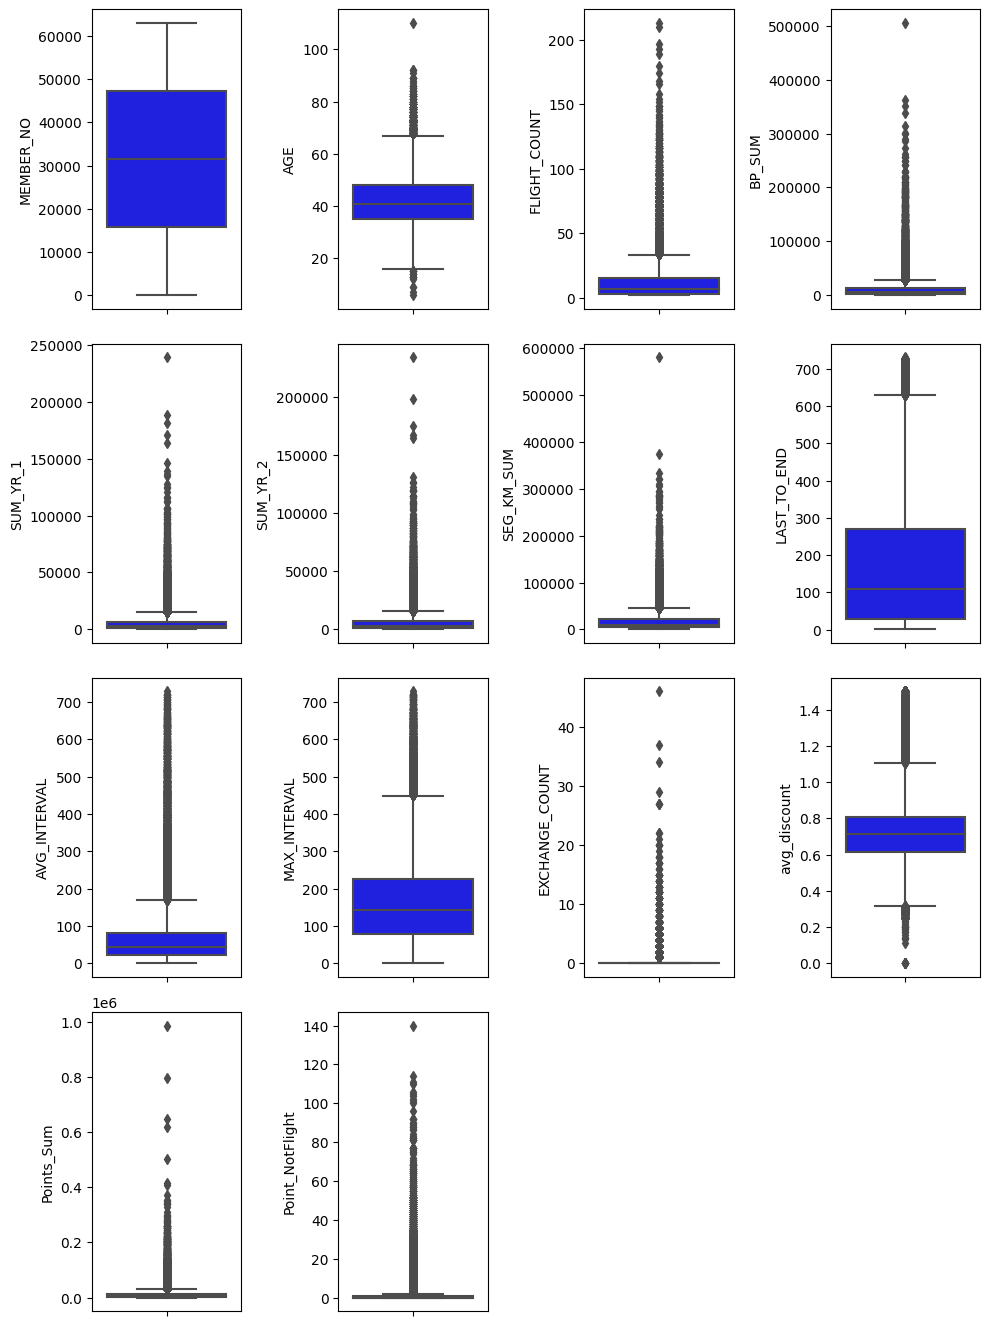

In [ ]:
# boxplot visualization

plt.figure(figsize=(10, 20))
for i in range(0, len(nums)):
    plt.subplot(6, 4, i+1)
    sns.boxplot(y=df[nums[i]], color='blue')
    plt.tight_layout()

plt.show()

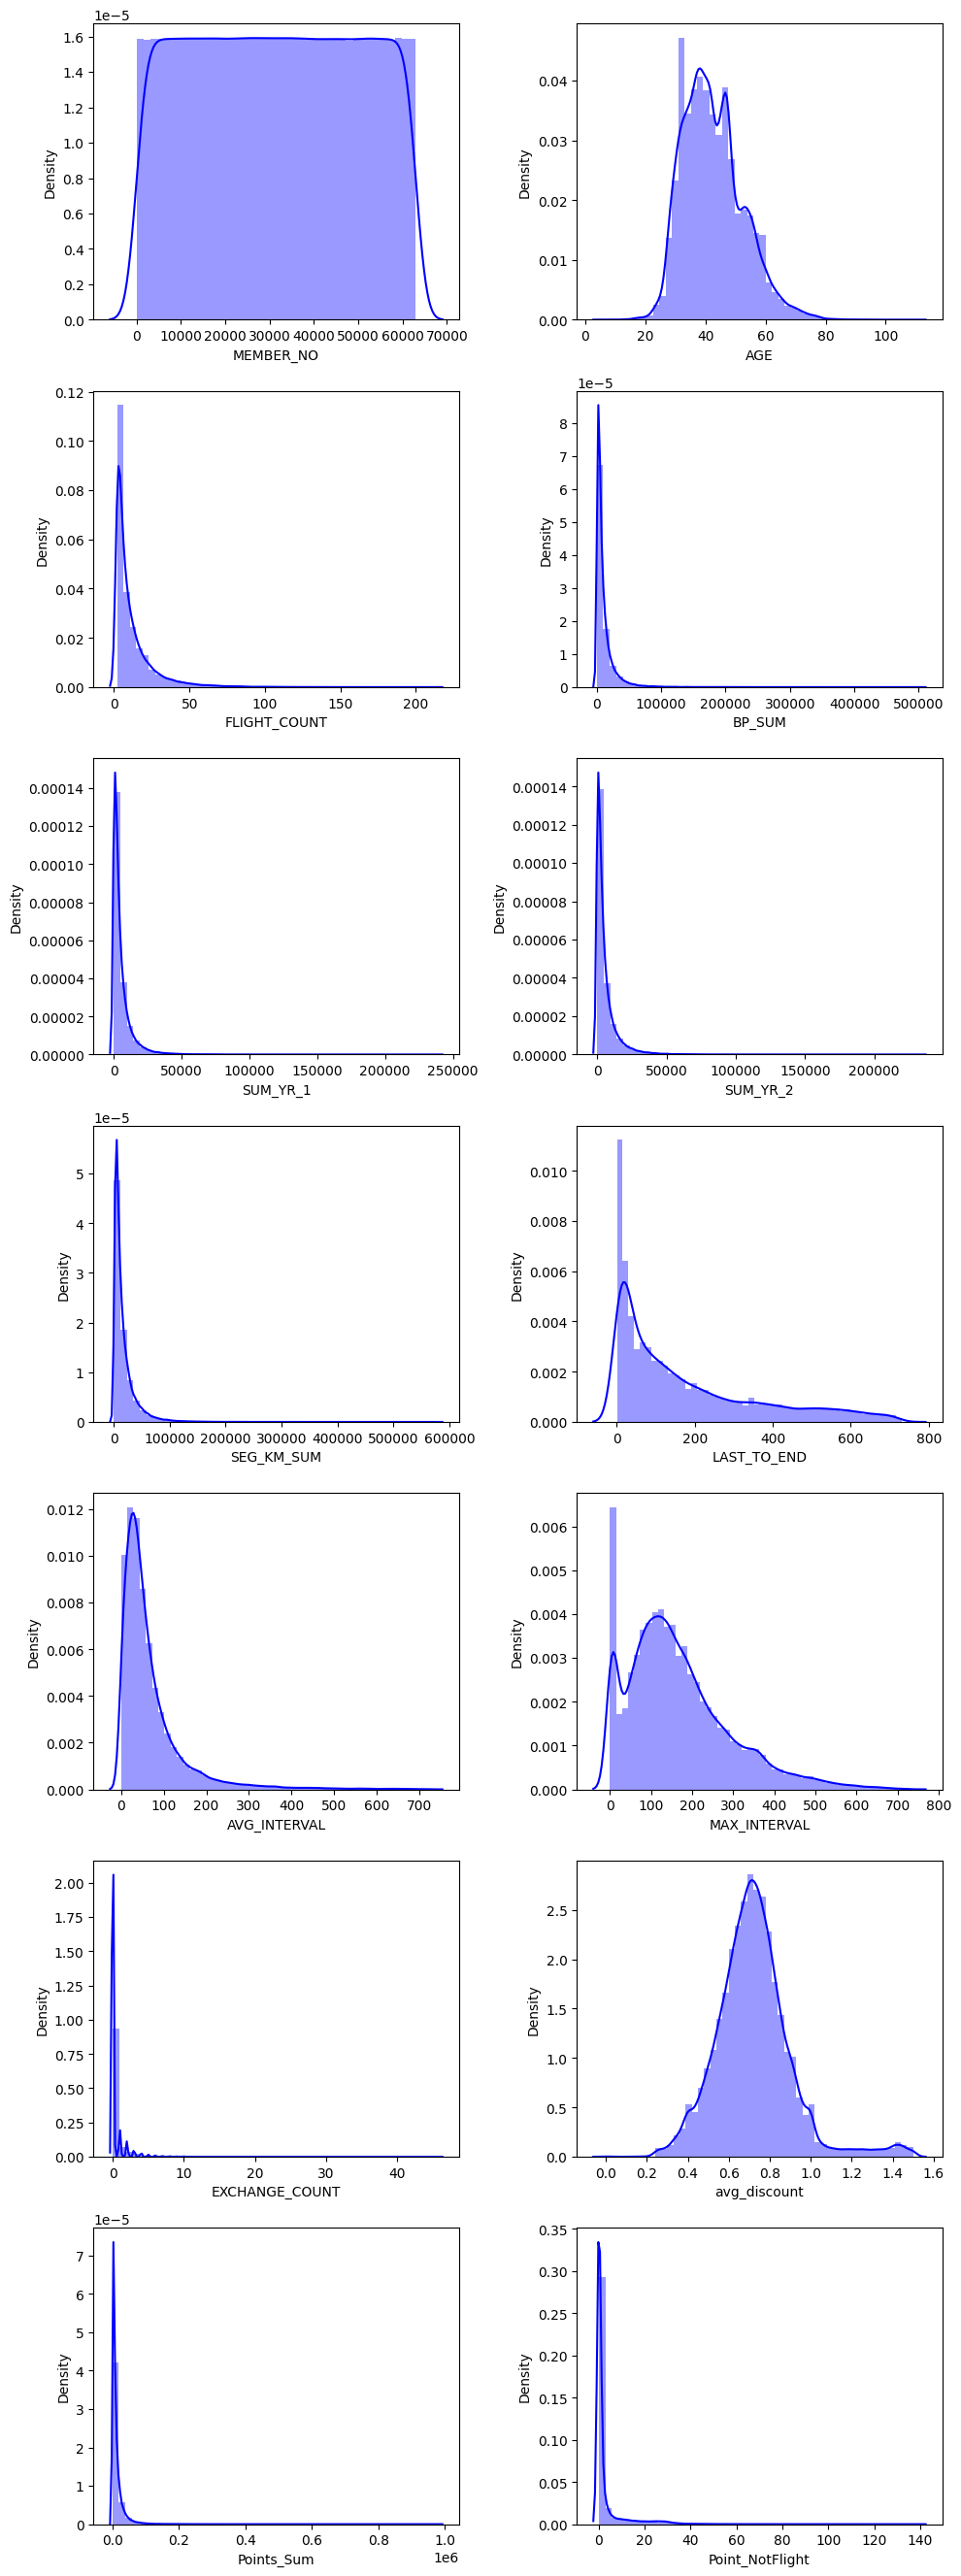

In [ ]:
# Displot Visualization

plt.figure(figsize=(10, 30))
for i in range(0, len(nums)):
    plt.subplot(8, 2,i+1)
    sns.distplot(df[nums[i]], color='blue')
    plt.tight_layout()

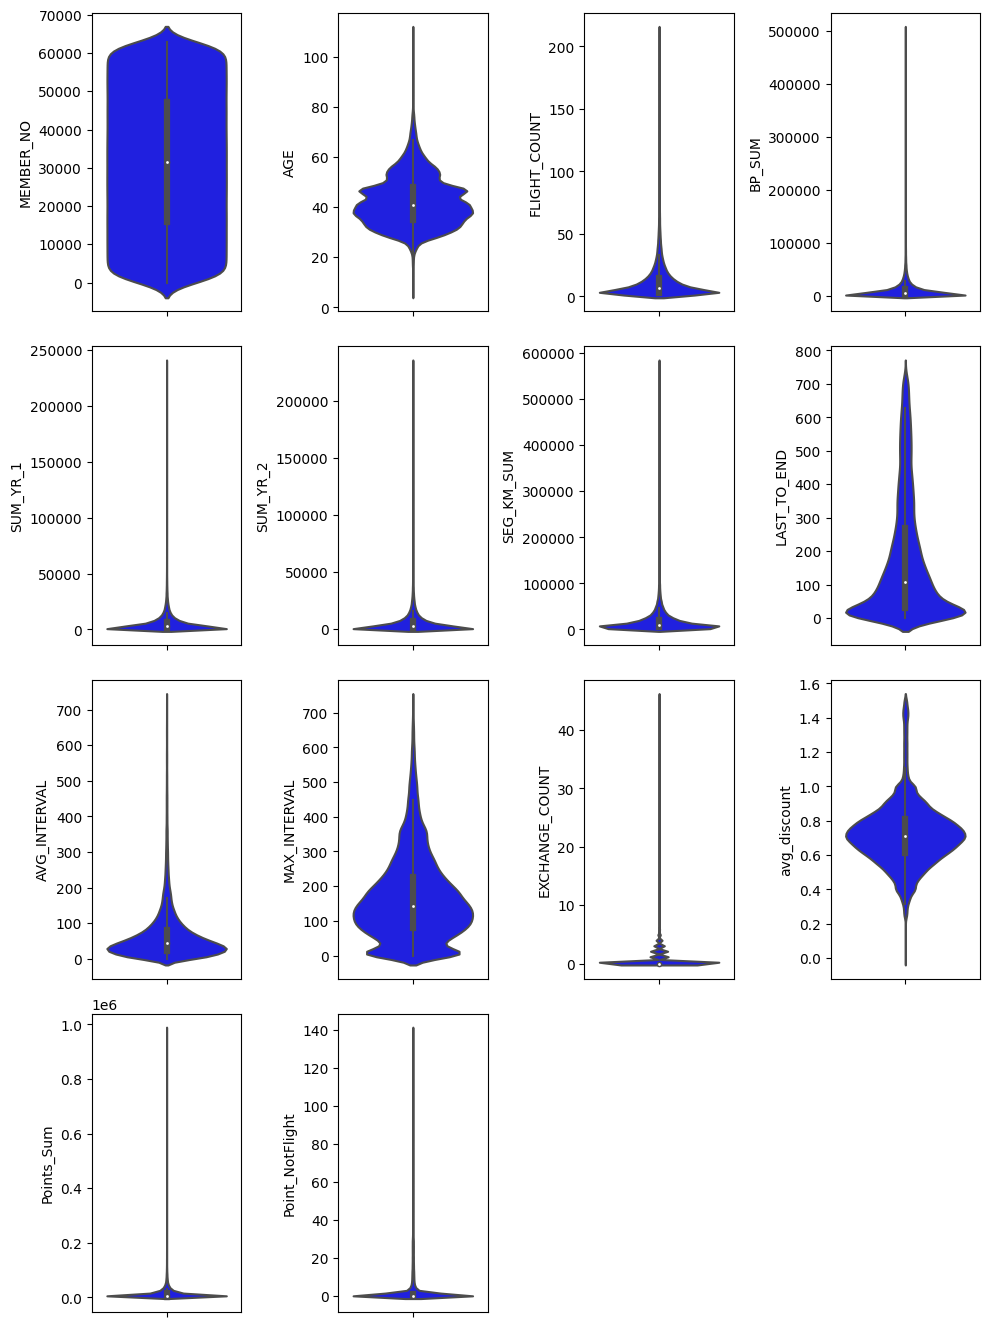

In [ ]:
# Violin Plot Visualization
plt.figure(figsize=(10, 20))
for i in range(0, len(nums)):
  plt.subplot(6, 4,i+1)
  sns.violinplot(y=df[nums[i]], color='blue')
  plt.tight_layout()

Dari grafik di atas dapat diketahui bahwa:

1. Seluruh kolom memiliki outliers kecuali kolom MEMBER_NO
2. Seluruh kolom memiliki distribusi yang skew kecuali MEMBER_NO, AGE, dan avg_discount

#### Multivariate Analysis

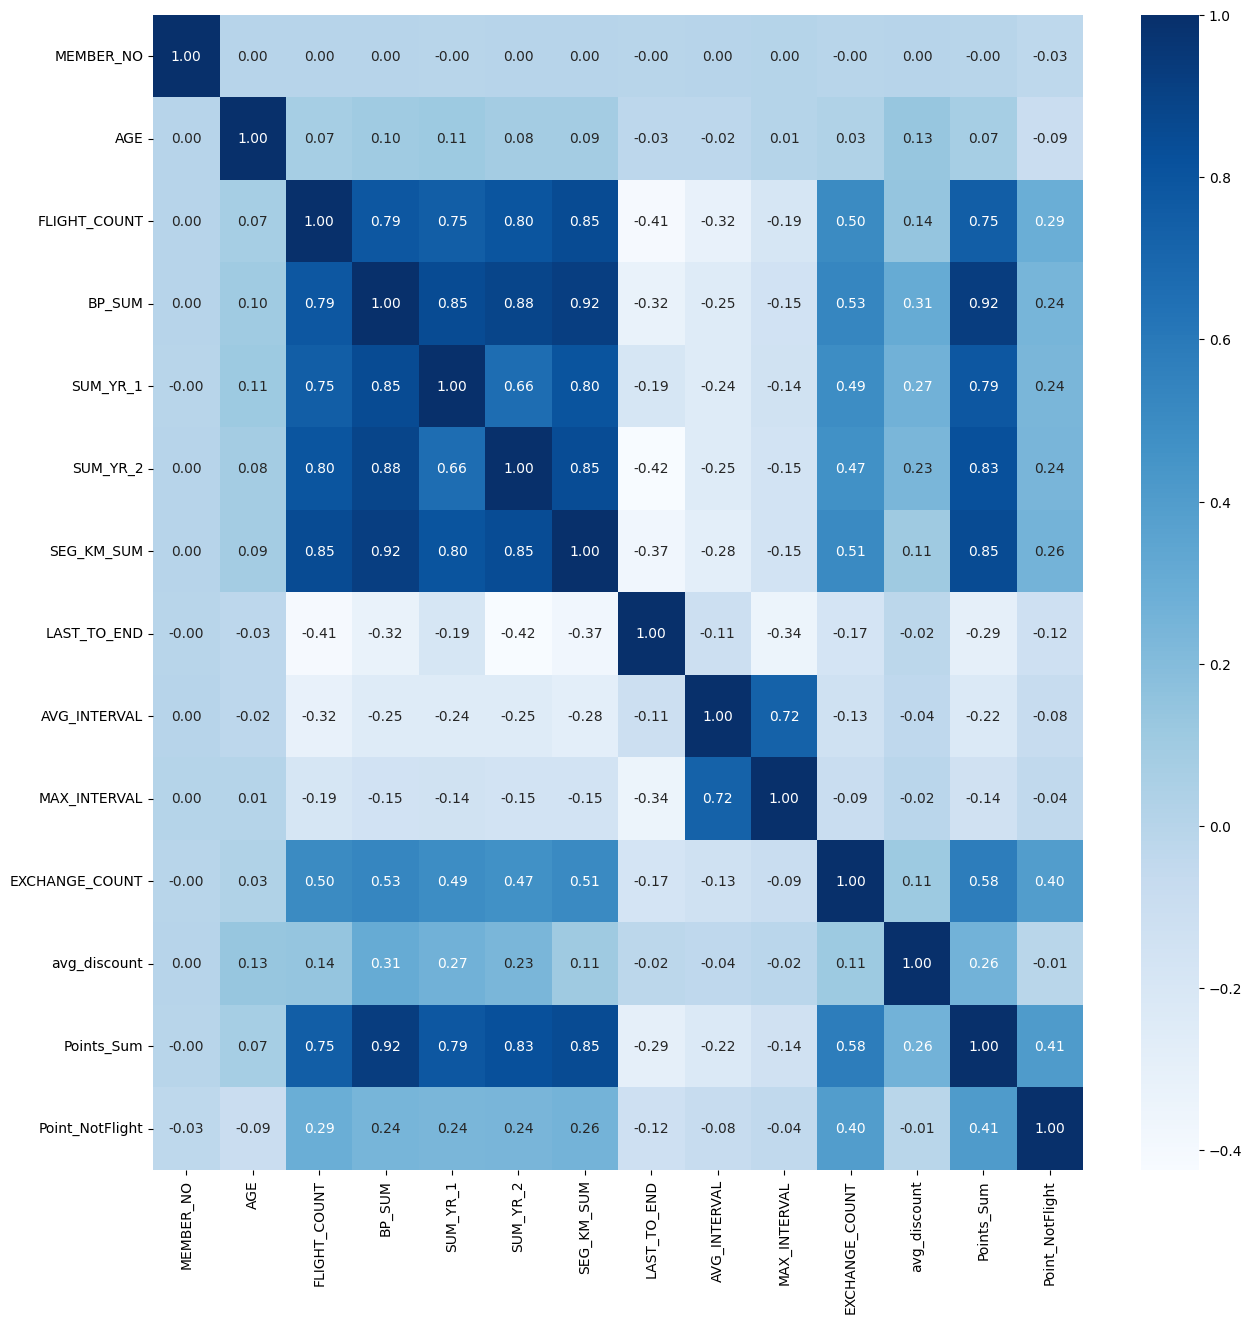

In [ ]:
# Heat Map (Correlation)
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

Dari heat map di atas dapat diketahui, feature yang memiliki korelasi yang kuat (> 0.7) adalah:
1. FLIGHT_COUNT dan BP_SUM (0.79)
2. FLIGHT_COUNT dan SUM_YR_1 (0.75)
3. FLIGHT_COUNT dan SUM_YR_2 (0.80)
4. FLIGHT_COUNT dan SEG_KM_SUM (0.85)
5. FLIGHT_COUNT dan Points_Sum (0.75)
6. BP_SUM dan SUM_YR_1 (0.85)
7. BP_SUM dan SUM_YR_2 (0.88)
8. BP_SUM dan SEG_KM_SUM (0.92)
9. BP_SUM dan Points_Sum (0.92)
10. SUM_YR_1 dan SEG_KM_SUM (0.80)
11. SUM_YR_1 dan Points_Sum (0.79)
12. SUM_YR_2 dan SEG_KM_SUM (0.85)
13. SUM_YR_2 dan Points_Sum (0.83)
14. SEG_KM_SUM dan Points_Sum (0.85)
15. AVG_INTERVAL dan MAX_INTERVAL (0.72)


<Figure size 1500x1500 with 0 Axes>

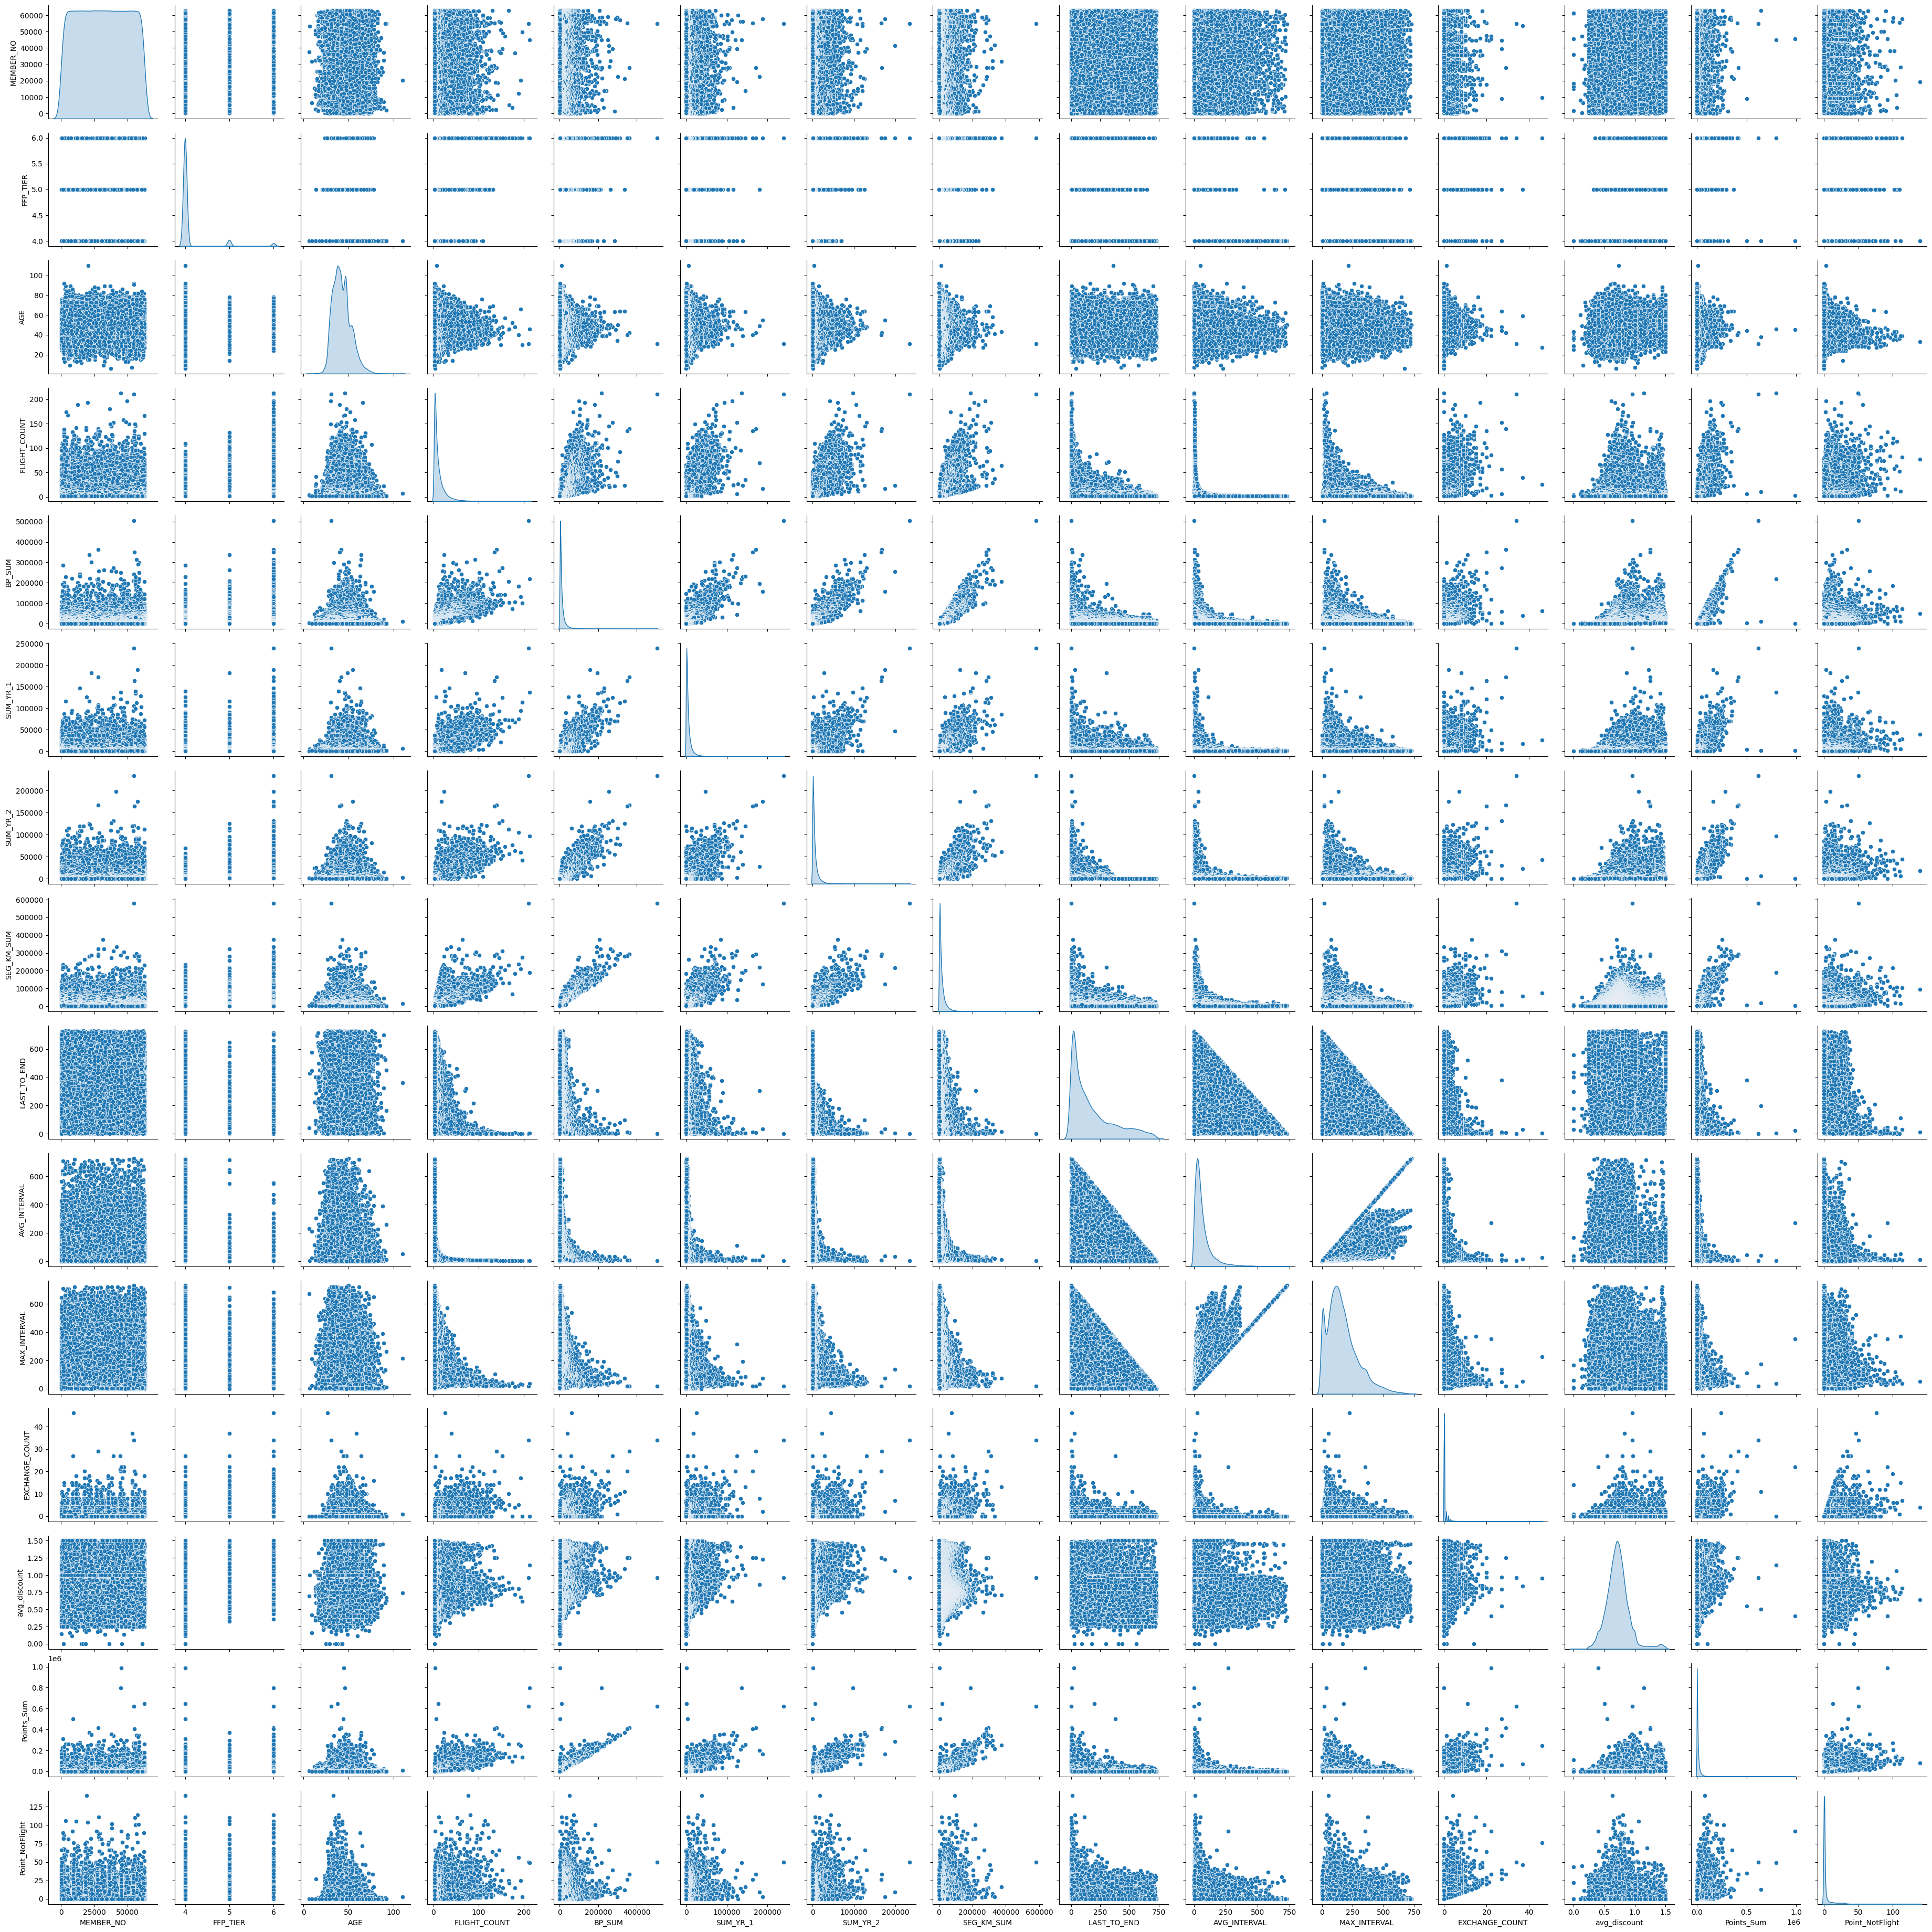

In [ ]:
# Pair Plot
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')
plt.show()

Dari Pairplot di atas dapat diketahui bahwa terdapat beberapa feature yang memiliki korelasi linear seperti, kolom LAST_TO_END dan AVG_INTERVAL.

## **Feature engineering**

### Feature Selection
Menggunakan Metode LRMF


Recency (R): Hitung selisih antara tanggal saat ini dan tanggal penerbangan terakhir.

Frequency (F): Gunakan nilai FLIGHT_COUNT sebagai frekuensi penerbangan.

Monetary Value (M): Hitung total dari SUM_YR_1

Cabin : Hitung



In [ ]:
# Menghapus baris dengan tanggal tidak valid
df = df[df['LAST_FLIGHT_DATE'].apply(lambda x: pd.to_datetime(x, errors='coerce') is not pd.NaT)]

# Menghitung Recency (R)
current_date = pd.to_datetime('2023-08-10')
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'])
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'])
df['Recency'] = (df['LOAD_TIME'] - df['LAST_FLIGHT_DATE']).dt.days

In [ ]:
# Menghitung Frequency (F)
df['Frequency']=df['FLIGHT_COUNT']


In [ ]:
# Menghitung Monetary Value (M)
df['Monetary_Value'] = df['SUM_YR_1']

In [ ]:
# Menampilkan hasil perhitungan
df_1=df[['Recency', 'Frequency', 'Monetary_Value']]
df_1.sample(5)

Recency  Frequency  Monetary_Value
16919        0          9         10825.0
40156      598          4          4620.0
1333         4         19         15048.0
43060       43          4             0.0
15786        1         15          7373.0

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62567 entries, 0 to 62987
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Recency         62567 non-null  int64  
 1   Frequency       62567 non-null  int64  
 2   Monetary_Value  62016 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.9 MB


### Processing

#### Drop Kolom dengan nilai NULL

In [ ]:
#Drop kolom dengan null
df_2= df_1.dropna(subset=['Monetary_Value'])

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62016 entries, 0 to 62986
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Recency         62016 non-null  int64  
 1   Frequency       62016 non-null  int64  
 2   Monetary_Value  62016 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.9 MB


In [ ]:
df_2.describe()

Recency     Frequency  Monetary_Value
count  62016.000000  62016.000000    62016.000000
mean     172.114164     11.895462     5352.327839
std      181.127483     14.086022     8116.830365
min        0.000000      2.000000        0.000000
25%       28.000000      3.000000     1005.750000
50%      105.000000      7.000000     2800.000000
75%      260.000000     15.000000     6567.000000
max      729.000000    213.000000   239560.000000

In [ ]:
df_2.sample(5)

Recency  Frequency  Monetary_Value
39285        2         15             0.0
47791      174          3           917.0
62087      562          2           888.0
33473      209          4          4359.0
9989       115         21          2296.0

### Handle Outlier

In [ ]:
numeric_columns = ['Recency', 'Frequency', 'Monetary_Value']

# Fungsi untuk menghapus outlier berdasarkan IQR
def remove_outliers_iqr(data, column):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Menghapus outlier pada kolom numerik
for col in numeric_columns:
    df_2= remove_outliers_iqr(df_2, col)

In [ ]:
df_2.describe()

Recency     Frequency  Monetary_Value
count  52095.000000  52095.000000    52095.000000
mean     169.000710      8.250581     3171.386991
std      161.123765      6.493895     3054.327621
min        0.000000      2.000000        0.000000
25%       35.000000      3.000000      723.000000
50%      116.000000      6.000000     2294.000000
75%      258.000000     11.000000     4831.000000
max      608.000000     31.000000    12566.000000

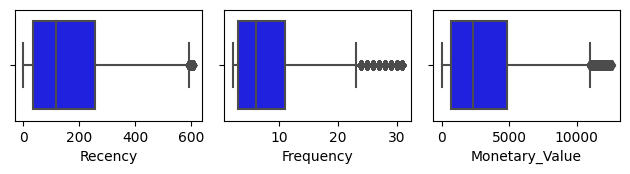

In [ ]:
#Individual Displot
for i in range (0, len(numeric_columns)):
  plt.subplot(3,3,i+1)
  sns.boxplot(x=df_2[numeric_columns[i]],color='blue')
  plt.xlabel(numeric_columns[i])
  plt.tight_layout()


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52095 entries, 94 to 62986
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Recency         52095 non-null  int64  
 1   Frequency       52095 non-null  int64  
 2   Monetary_Value  52095 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.6 MB


### StandardScaler

In [ ]:
features=['Recency', 'Frequency', 'Monetary_Value']
x=df_2[features].copy()


In [ ]:
from sklearn.preprocessing import StandardScaler

#Scaling Standarisasi
scaler=StandardScaler()
scaler.fit(x)
X_std=scaler.transform(x)

In [ ]:
new_df=pd.DataFrame(X_std,columns=features)

In [ ]:
new_df.describe()

Recency     Frequency  Monetary_Value
count  5.209500e+04  5.209500e+04    5.209500e+04
mean  -5.237516e-17  2.618758e-17    5.237516e-17
std    1.000010e+00  1.000010e+00    1.000010e+00
min   -1.048898e+00 -9.625411e-01   -1.038336e+00
25%   -8.316712e-01 -8.085488e-01   -8.016201e-01
50%   -3.289472e-01 -3.465720e-01   -2.872630e-01
75%    5.523713e-01  4.233893e-01    5.433697e-01
max    2.724635e+00  3.503235e+00    3.075866e+00

In [ ]:
#new_df=pd.DataFrame(X_std,columns=features)
new_df.sample(5)

Recency  Frequency  Monetary_Value
2394  -0.192405   3.195250        2.605709
16800  1.042682  -0.962541       -0.367150
4080  -0.093101   2.425289        2.147339
47416  1.247496  -0.808549       -0.484690
18560  1.030269   0.269397        1.093087

## **Lakukan clustering K-means**

# K-Means

In [ ]:
scaled_df = new_df.copy()

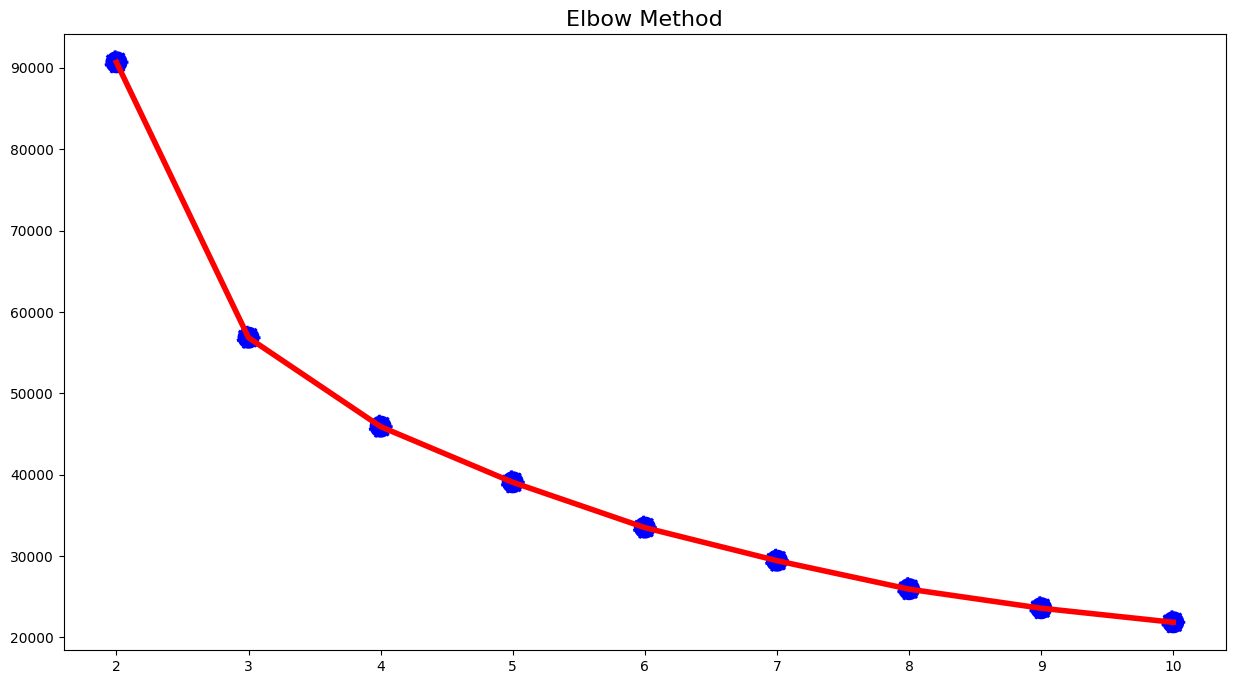

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(15, 8))

sns.lineplot(x=range(2, 11), y=inertia, color='red', linewidth = 4)
sns.scatterplot(x=range(2,11), y=inertia, s=300, color='blue',  linestyle='--')

plt.title('Elbow Method', fontsize=16)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(scaled_df)
    preds = kmeans.predict(scaled_df)

    score_euclidean = silhouette_score(scaled_df, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

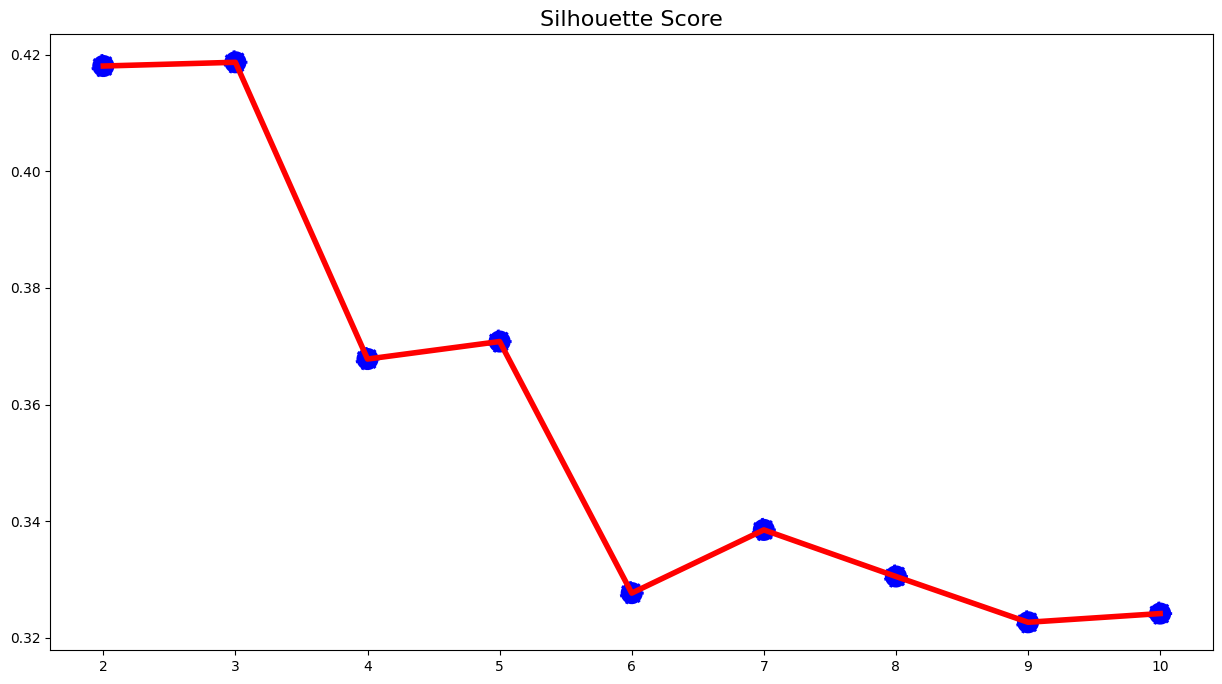

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='red', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='blue',  linestyle='--')

plt.title('Silhouette Score', fontsize=16)
plt.show()

# Membuat Cluster

In [ ]:
df_cl = df_2.copy()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_df)
df_cl['km_labels'] = kmeans.labels_

In [ ]:
df_cl.groupby(['km_labels']).count()

Recency  Frequency  Monetary_Value
km_labels                                    
0            26746      26746           26746
1            12932      12932           12932
2            12417      12417           12417

# Dimensionality Reduction for Visualization

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(scaled_df)
pcs = pca.transform(scaled_df)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca.head()

PC 1      PC 2
0  2.474450  1.187038
1  2.241859  0.097673
2  0.408602 -1.328363
3  3.724085  0.995402
4  2.430228  0.682066

In [ ]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52095 entries, 0 to 52094
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC 1    52095 non-null  float64
 1   PC 2    52095 non-null  float64
dtypes: float64(2)
memory usage: 814.1 KB


In [ ]:
df_pca['km_labels'] = kmeans.labels_
df_pca.head(2)

PC 1      PC 2  km_labels
0  2.474450  1.187038          1
1  2.241859  0.097673          1

In [ ]:
df_pca['km_labels'].value_counts()

0    26746
1    12932
2    12417
Name: km_labels, dtype: int64

#### Evaluasi model

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2"
    hue="km_labels",
    data=df_pca,
    edgecolor='black',
    linestyle='--',
    s=160,
    ax=ax
)

plt.title('Cluster Analysis', fontsize=16)

SyntaxError: ignored

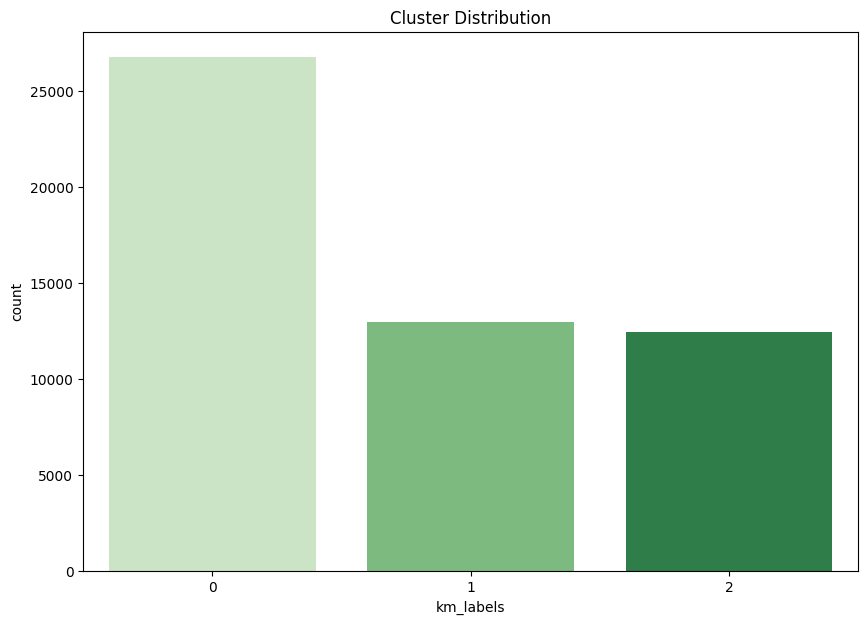

In [ ]:
plt.figure(figsize=(10,7))
pl = sns.countplot(x = df_pca['km_labels'], palette='Greens')
pl.set_title('Cluster Distribution')
plt.show()

## **Interpretasi**

In [ ]:
df_cl['km_labels'] = kmeans.labels_
df_cl.groupby(['km_labels']).count()

Recency  Frequency  Monetary_Value
km_labels                                    
0            26746      26746           26746
1            12932      12932           12932
2            12417      12417           12417

In [ ]:
df_cl.groupby(['km_labels'])[features].agg(['mean', 'median', 'std'])

Recency                     Frequency                   \
                 mean median         std       mean median       std   
km_labels                                                              
0          100.287781   88.0   75.470844   5.968631    5.0  3.436526   
1           75.642051   44.0   81.698584  17.084596   16.0  5.845215   
2          414.237900  401.0  101.531490   3.965451    3.0  2.247030   

          Monetary_Value                       
                    mean  median          std  
km_labels                                      
0            1437.376954  1078.0  1485.595613  
1            6982.549722  6863.0  2739.031076  
2            2937.181951  2403.0  2216.621288

## **Deskripsi Masing-masing Cluster**
Deskripsi Masing-masing Cluster

1. Cluster 0 merupakan segmen pelanggan yang cukup recent dengan rata-rata recency sekitar 100 hari dan frequency terbang yang tergolong sedang dengan sekitar 5 penerbangan, serta monetary value yang paling rendah diantara cluster lainnya dengan rata-rata sekitar 1400. Cluster ini bisa dianggap sebagai Regular Budget Travellers.

2. Cluster 1 merupakan segmen pelanggan yang paling recent dengan rata-rata recency sedikit dibawah cluster 0 (75 hari) dan frequency terbang yang paling tinggi dan cukup jauh diatas cluster lainnya dengan sekitar 17 penerbangan, serta monetary value yang tertinggi diantara cluster lainnya dengan rata-rata sekitar 6900. Cluster ini bisa dianggap sebagai High Value Customers.

3. Cluster 2 merupakan segmen pelanggan yang paling tidak recent dengan rata-rata recency sekitar 414 hari dan frequency terbang terendah diantara cluster lainnya dengan sekitar 3 penerbangan, serta monetary value yang tergolong sedang dengan rata-rata sekitar 2900. Cluster ini bisa dianggap sebagai Non-frequent Luxury Travellers.

Jadi cluster 1 merupakan segment High Value Customers yang terbaik di ketiga metrik (fitur), sedangkan perbedaan antara cluster 0 dan cluster 2 adalah cluster 0 lebih recent dan sering terbang namun monetary value nya rendah (Regular Budget Travellers) sebaliknya cluster 2 tidak recent dan lebih jarang terbang namun memiliki monetary value lebih tinggi (Non-frequent Luxury Travellers).

## **Rekomendasi Bisnis**

1. Memberikan layanan VIP kepada High Value Customers: Menawarkan layanan khusus untuk high value customers seperti lounge khusus di bandara, akses prioritas dan promo khusus frequent flyers agar high value customers menjadi lebih loyal dan memiliki experince yang lebih VIP.

2. Melakukan campaign dan promo bagi customer lainnya: Memberikan promo bagi segment Regular Budget Travellers agar lebih sering melakukan penerbangan bersama maskapai ini. Melakukan campaign kepada segment Non-Frequent Luxury Travellers agar kembali terbang bersama maskapai ini dan meningkatkan kontribusi monetary value nya.